/Users/sungchullee/opt/anaconda3/envs/gym/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sungchullee/opt/anaconda3/envs/gym/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sungchullee/opt/anaconda3/envs/gym/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sungchullee/opt/an

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from temp/savefiles/model_1


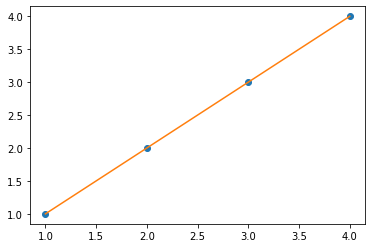

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

lr = 1e-2
epoch = int(1e3)

x_data = np.array([[1.],[2.],[3.],[4.]]).astype(np.float32) # (4,1)
y_data = np.array([[1.],[2.],[3.],[4.]]).astype(np.float32) # (4,1)

x = tf.placeholder(tf.float32, shape=(None,1), name='x') # (4,1)
y = tf.placeholder(tf.float32, shape=(None,1), name='y') # (4,1)

if 0:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
    beta = tf.get_variable('beta', (1,1), dtype=tf.float32, initializer=tf.keras.initializers.constant(1.0))
elif 1:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.5))
    beta = tf.get_variable('beta', (1,1), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.5))
elif 0:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
    beta = tf.get_variable('beta', (1,1), dtype=tf.float32, initializer=tf.keras.initializers.RandomUniform())
elif 1:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
    beta = tf.get_variable('beta', (1,1), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())

y_pred = tf.identity(alpha + x @ beta, name='y_pred')
loss = tf.nn.l2_loss(y-y_pred)
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    feed_dict = {x:x_data, y:y_data}
    for i in range(epoch):
        sess.run(train, feed_dict=feed_dict)  
    
    saver = tf.train.Saver()
    save_dir = 'temp/savefiles' 
    save_path = 'temp/savefiles/model_1'
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    saver.save(sess=sess, save_path=save_path)
    
with tf.Session() as sess:
    
    save_path = 'temp/savefiles/model_1'
    saver = tf.train.import_meta_graph(save_path + '.meta', clear_devices=True)
    saver.restore(sess=sess, save_path=save_path)

    x = sess.graph.get_tensor_by_name('x:0')
    y = sess.graph.get_tensor_by_name('y:0')
    y_pred = sess.graph.get_tensor_by_name('y_pred:0')
    
    feed_dict = {x:x_data, y:y_data}   
    y_pred_run = sess.run(y_pred, feed_dict=feed_dict)

fig, ax = plt.subplots(1, 1)
ax.plot(x_data.reshape((-1,)), y_data.reshape((-1,)), 'o')
ax.plot(x_data.reshape((-1,)), y_pred_run.reshape((-1,)))
plt.show()